In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

r = 0.05
sigma = 0.4
s = 100
K = 100
T = 1
mu_values = [-0.2, 0, 0.2, r - sigma**2/2]

In [2]:
def simulate_log_returns_binomial(N, mu, s, r, sigma, n_simulations):
    #Compute up and down factors
    u_N = np.exp(mu/N + sigma*np.sqrt(1/N))
    d_N = 1/u_N
    
    #Risk-neutral probability
    p_N = (np.exp(r/N) - d_N) / (u_N - d_N)
    
    log_returns = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        #out of N trials, n_ups were successfull -> n_ups num of up moves, n_downs num of down moves
        n_ups = np.random.binomial(N, p_N)
        n_downs = N - n_ups
        
        #Final stock price
        S_1 = s * (u_N**n_ups) * (d_N**n_downs)
        
        #Log return
        log_returns[i] = np.log(S_1 / s)
    
    return log_returns


Theoretical values:
  Mean: -0.030000
  Std:  0.400000

--- μ = -0.2000 ---
  Estimated mean: -0.033476
  Estimated std:  0.396410
  Difference in mean: 0.003476
  Difference in std:  0.003590

--- μ = 0.0000 ---
  Estimated mean: -0.028278
  Estimated std:  0.396568
  Difference in mean: 0.001722
  Difference in std:  0.003432

--- μ = 0.2000 ---
  Estimated mean: -0.032783
  Estimated std:  0.406436
  Difference in mean: 0.002783
  Difference in std:  0.006436

--- μ = -0.0300 ---
  Estimated mean: -0.036515
  Estimated std:  0.397229
  Difference in mean: 0.006515
  Difference in std:  0.002771


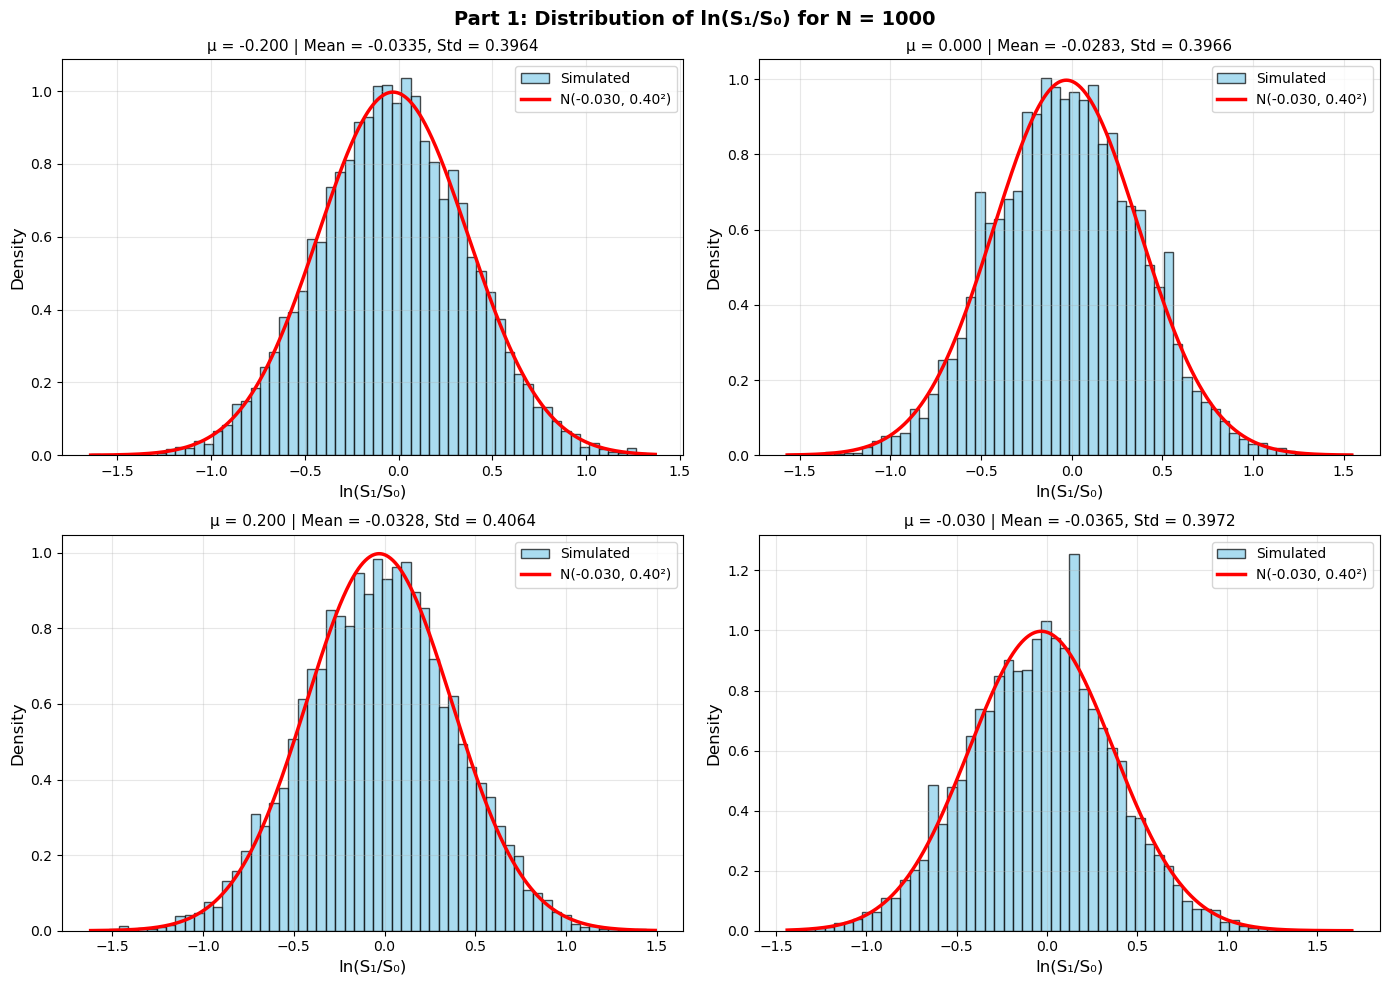


KEY OBSERVATION:
The distribution does NOT depend on μ!
All distributions converge to N(r - σ²/2, σ²) regardless of μ


In [3]:
N_max = 1000
n_simulations = 10000

theoretical_mean = r - sigma**2/2
theoretical_std = sigma

print(f"\nTheoretical values:")
print(f"  Mean: {theoretical_mean:.6f}")
print(f"  Std:  {theoretical_std:.6f}")

# Create figure for histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

results_part1 = {}

for idx, mu in enumerate(mu_values):
    print(f"\n--- μ = {mu:.4f} ---")
    
    # Simulate (using binomial method for speed)
    log_returns = simulate_log_returns_binomial(N_max, mu, s, r, sigma, n_simulations)
    
    # Compute statistics
    mean_est = np.mean(log_returns)
    std_est = np.std(log_returns, ddof=1)
    
    print(f"  Estimated mean: {mean_est:.6f}")
    print(f"  Estimated std:  {std_est:.6f}")
    print(f"  Difference in mean: {abs(mean_est - theoretical_mean):.6f}")
    print(f"  Difference in std:  {abs(std_est - theoretical_std):.6f}")
    
    results_part1[mu] = {
        'mean': mean_est,
        'std': std_est,
        'log_returns': log_returns
    }
    
    # Create histogram
    axes[idx].hist(log_returns, bins=60, density=True, alpha=0.7,
                   color='skyblue', edgecolor='black', label='Simulated')
    
    # Overlay theoretical normal distribution
    x = np.linspace(log_returns.min(), log_returns.max(), 1000)
    axes[idx].plot(x, norm.pdf(x, theoretical_mean, theoretical_std),
                   'r-', linewidth=2.5, 
                   label=f'N({theoretical_mean:.3f}, {theoretical_std:.2f}²)')
    
    axes[idx].set_xlabel('ln(S₁/S₀)', fontsize=12)
    axes[idx].set_ylabel('Density', fontsize=12)
    axes[idx].set_title(f'μ = {mu:.3f} | Mean = {mean_est:.4f}, Std = {std_est:.4f}', 
                        fontsize=11)
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle(f'Part 1: Distribution of ln(S₁/S₀) for N = {N_max}', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('problem6_part1_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("KEY OBSERVATION:")
print("The distribution does NOT depend on μ!")
print("All distributions converge to N(r - σ²/2, σ²) regardless of μ")
print("="*70)